# Python Block Course
# Assignment 2: Python intermediate (Visualization, Loops, Pandas)

Marc Luettecke, Anna Bahss

Winter Term 2020 / 2021

In this second assignment we will create our first visualization with Matplotlib, create dictionaries and learn to modify and filter their content. You can score up to 3 points in this assignment. Please submit your solutions by sending it to **marc.luettecke@subsequent.ai** or **anna.bahss@uni-konstanz.de** (ideally both). Please include "**Python Blockkurs 2020 Assignment 2**" in the subject line of the email. The deadline for submission is on **Wednesday, October 28, 09:59**, everything submitted after will automatically receive a grade of 0/3.

**Notice: There's nothing new under the sun. Some of these problems are inspired by problems already existing out there. We can't avoid you copying code off the web, but know that 1. it is surprisingly easy to spot, if somebody uses techniques not introduced or referenced in the assignments yet, 2. you are missing out on actually understanding how to solve the problems with the tools (or at least hints) provided. Do yourself a favor and don't plagiarize.**

## 2.1 Visualizing Data
Visualizing data plays an important role when gaining an overview and generating first insights. 
We will be using a dataset which contains real data from the most infamous shipwrecks in history: The Titanic. 
You can find the data here "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv". It contains detailed information about the passengers abord the ship. Please use this source to load the data in the exercise below.


<div class="alert alert-block alert-info">
<b>Exercise (1.5 Points)</b>: Work through the documented steps below and solve the assignment. Be careful for hints and specific instructions.
</div>

In [2]:
# import the matplotlib.pyplot and pandas package 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# load and save data (from the source stated above). 
    #The link above somehow is not available for me, so I use the source from  https://github.com/jesuspemu/Titanic
# Hint: Use a pandas method and keep in mind that the data is stored as csv
titanic_data = pd.read_csv('./train.csv')
# to gain a rough overview you can inspect the data using the method .head(10). 
# This displays the first ten rows of the dataset.
titanic_data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In the following we want to take a closer look at the survival rate depending on certain characteristics. There are many fast and easy ways to subset data. Nevertheless, please follow the instructions so you can apply your knowledge gained during the course.

Hint: Missings can be replaced by the median with following code:

`my_subset["age"].fillna(fem_passengers["age"].median(), inplace=True)`


You can ignore the "SettingWithCopyWarning" message.

In [3]:
# create subset with only females (please use the boolean variable stored in the data)
females = titanic_data.loc[lambda df: df['Sex']=='female']
# females.head(10)

# impute missings with median inplace
females['Age'].fillna(females['Age'].median(), inplace=True)
females_survived = females['Survived']
females_ages = females['Age']
females_ages.head(10)



# using this subset, please fill two lists each storing the ages of the survived and deceased respectively. 
# Use a single loop to do so.
# When using the index as an iterator, please consider, that you have subsetted the dataframe.
survived_ages_list = []
deceased_ages_list = []
for i in range(len(females_survived)):
    if females_survived.iloc[i] == 1:
        survived_ages_list.append(females_ages.iloc[i])
    else:
        deceased_ages_list.append(females_ages.iloc[i])

# choose an appropriate visualization for your data and label it accordingly. Show both survived and deceased.
visual_df = pd.DataFrame({'average': [0, 0],
                        'standard deviation': [0, 0]},
                        index = ['Survived', 'Deceased'])
visual_df.iloc[0, 0] = np.mean(survived_ages_list)
visual_df.iloc[1, 0] = np.mean(deceased_ages_list)
visual_df.iloc[0, 1] = np.std(survived_ages_list)
visual_df.iloc[1, 1] = np.std(deceased_ages_list)
print(visual_df)



            average  standard deviation
Survived  28.562232           13.018099
Deceased  25.456790           12.036774


Using simply the absolute numbers makes it very hard to compare the data. Modify the subsetted data, so you can generate a visualization which shows the ages on the x-axis and the **relative chances of survival by age** on the y-axis.

It is important to structure the data in a meaningful way. 
Additionaly, use pandas.cut to bin values into discrete intervals by using the bins we have already pre-defined for you.

`# create bins
import numpy as np
bins = np.arange(0, titanic["age"].max()+10, 10)`

Hint: Check the documentation on grouping by mean with pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).


              Num_of_survival
Age_interval                 
(0.0, 10.0]                19
(10.0, 20.0]               34
(20.0, 30.0]               97
(30.0, 40.0]               46
(40.0, 50.0]               21
(50.0, 60.0]               13
(60.0, 70.0]                3
(70.0, 80.0]                0


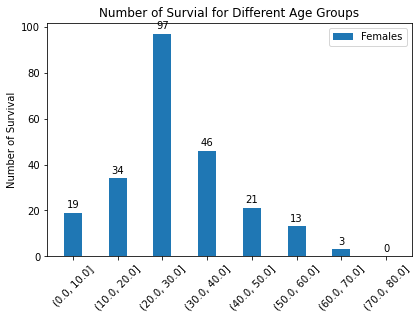

In [4]:
# find mean survival for groups of age (only females)
bins = np.arange(0, titanic_data["Age"].max()+10, 10)
category = pd.cut(survived_ages_list, bins = bins)
plot_df = pd.DataFrame({'Age_of_survival': survived_ages_list})
plot_df['Age_interval'] = category
new_plot_df = plot_df.groupby(['Age_interval']).count() 

new_plot_df.columns = ['Num_of_survival']
print(new_plot_df)



# create bar plot and add labels
labels = ['(0.0, 10.0]', '(10.0, 20.0]', '(20.0, 30.0]', '(30.0, 40.0]', '(40.0, 50.0]', '(50.0, 60.0]', '(60.0, 70.0]', '(70.0, 80.0]']
num_of_survival = new_plot_df['Num_of_survival']

x = np.arange(len(labels))
width = 0.4


fig, ax = plt.subplots()
rects0 = ax.bar(x, num_of_survival, width, label = 'Females')

ax.set_ylabel('Number of Survival')
ax.set_title('Number of Survial for Different Age Groups')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects0)


fig.tight_layout()


# show plot
plt.xticks(rotation = 45)
plt.show()


Now visualize the relative chances of survival by age for men only.

   Age_interval  Num_of_survival
0   (0.0, 10.0]               33
1  (10.0, 20.0]               69
2  (20.0, 30.0]              273
3  (30.0, 40.0]              100
4  (40.0, 50.0]               55
5  (50.0, 60.0]               28
6  (60.0, 70.0]               14
7  (70.0, 80.0]                5


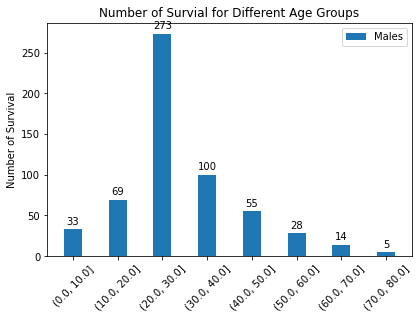

In [5]:


# find mean survival for groups of age (only males)
males = titanic_data.loc[lambda df: df['Sex']=='male']
males['Age'].fillna(females['Age'].median(), inplace=True)
bins = np.arange(0, titanic_data["Age"].max()+10, 10)
category = pd.cut(males['Age'], bins = bins)

males['Age_interval'] = category
males = males[['Age_interval', 'Age']]
males = males.groupby(['Age_interval']).count().reset_index()
males = males.rename(columns={ 'Age':'Num_of_survival'})
print(males)


# show plot
labels = ['(0.0, 10.0]', '(10.0, 20.0]', '(20.0, 30.0]', '(30.0, 40.0]', '(40.0, 50.0]', '(50.0, 60.0]', '(60.0, 70.0]', '(70.0, 80.0]']
num_of_survival = males['Num_of_survival']

x = np.arange(len(labels))
width = 0.4


fig, ax = plt.subplots()
rects1 = ax.bar(x, num_of_survival, width, label = 'Males')

ax.set_ylabel('Number of Survival')
ax.set_title('Number of Survial for Different Age Groups')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)


fig.tight_layout()

plt.xticks(rotation = 45)
plt.show()

**Question:** If we would transfer the Titanic data into a dictionary, what could it look like? Would it make sense doing so?
Please explain briefly (4-5 sentences).

**Answer:** From my point of view, we need to establish a dict variable for each record. If we have 100 records, we need to establish 100 dict variable. The keys would be the attributes' name, and the value are specific information. This way is more space-consuming than list. Besides, if we want to buid our dataframe over dict, It would be more complex when we implement the methods of dataframe. I think it is not easy to do so.

## 2.2 Analyzing Data
In the above exercise you subsetted data to build a good visualization. We can now apply the knowledge of accessing certain parts of the data to analyze it more deeply. For the next exercise we will use a dataset containing international flights.

You can find it here: "https://raw.githubusercontent.com/snehavcs/NYC-Flight-Data-Analysis/master/flights.csv"


<div class="alert alert-block alert-info">
<b>Exercise (1 Point)</b>: Work through the documented steps below and solve the assignment. Be careful for hints and specific instructions.
</div>

In [6]:
# load and save data (from the source stated above).
flight_df = pd.read_csv("./flight_data.csv")
flight_df = flight_df.dropna(subset = ['dep_time', 'arr_time'],axis=0)
print(flight_df.head(20))
# inspect data
# flight_df.head(10)
# Add a column date in the dataframe with datetime objects using the columns year, month and day. (check for documentation)
date_list = [str(flight_df['year'].iloc[i])+'/'+str(flight_df['month'].iloc[i])+'/'+str(flight_df['day'].iloc[i]) for i in range(len(flight_df))]
flight_df['date'] = pd.to_datetime(date_list)
flight_df.tail(10)
# print(type(flight_df['year'].iloc[0]))

    year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0   2013      1    1     517.0             515        2.0     830.0   
1   2013      1    1     533.0             529        4.0     850.0   
2   2013      1    1     542.0             540        2.0     923.0   
3   2013      1    1     544.0             545       -1.0    1004.0   
4   2013      1    1     554.0             600       -6.0     812.0   
5   2013      1    1     554.0             558       -4.0     740.0   
6   2013      1    1     555.0             600       -5.0     913.0   
7   2013      1    1     557.0             600       -3.0     709.0   
8   2013      1    1     557.0             600       -3.0     838.0   
9   2013      1    1     558.0             600       -2.0     753.0   
10  2013      1    1     558.0             600       -2.0     849.0   
11  2013      1    1     558.0             600       -2.0     853.0   
12  2013      1    1     558.0             600       -2.0     924.0   
13  20

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,date
336760,2013,9,30,2211.0,2059,72.0,2339.0,2242,57.0,EV,4672,N12145,EWR,STL,120.0,872,20,59,30-09-2013 20:00,2013-09-30
336761,2013,9,30,2231.0,2245,-14.0,2335.0,2356,-21.0,B6,108,N193JB,JFK,PWM,48.0,273,22,45,30-09-2013 22:00,2013-09-30
336762,2013,9,30,2233.0,2113,80.0,112.0,30,42.0,UA,471,N578UA,EWR,SFO,318.0,2565,21,13,30-09-2013 21:00,2013-09-30
336763,2013,9,30,2235.0,2001,154.0,59.0,2249,130.0,B6,1083,N804JB,JFK,MCO,123.0,944,20,1,30-09-2013 20:00,2013-09-30
336764,2013,9,30,2237.0,2245,-8.0,2345.0,2353,-8.0,B6,234,N318JB,JFK,BTV,43.0,266,22,45,30-09-2013 22:00,2013-09-30
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,30-09-2013 22:00,2013-09-30
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,30-09-2013 22:00,2013-09-30
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,30-09-2013 22:00,2013-09-30
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,30-09-2013 22:00,2013-09-30
336769,2013,9,30,2349.0,2359,-10.0,325.0,350,-25.0,B6,745,N516JB,JFK,PSE,196.0,1617,23,59,30-09-2013 23:00,2013-09-30


How many flights flew from one of New Yorks airports (EWR, LGA, JFK) to Los Angeles (LAX) according to the dataset?

In [7]:
# print number of flights
dest_required = flight_df['dest'].map(lambda x: x=='LAX')
origin_required = flight_df['origin'].map(lambda x: x in ('EWR', 'LGA', 'JFK'))
NY_LA_flights = flight_df[dest_required & origin_required]
print(len(NY_LA_flights))

16058


Now we will introduce a **new package** called `sklearn`. We will use it to run a **linear regression** with our dataset at hand. 

Run a linear regression for the effect of delay at departure on flight speed. Compute the speed based on the distance and airtime. Ignore flights with a missing value in any necessary value. 


In [8]:
# compute speed
flight_df['speed'] = flight_df['distance']/(flight_df['arr_time']-flight_df['dep_time'])

# prepare dependent variable speed
speed = np.array(flight_df['speed'])
# prepare independent variable departure delay
dep_delay = np.array(flight_df['dep_delay'])
dep_delay = dep_delay.reshape(-1, 1)
# create linear regression model
from sklearn import linear_model
reg = linear_model.LinearRegression()
# compute linear regression model
reg.fit(dep_delay, speed)

# print intercept
print(reg.intercept_)
# print coefficients
print(reg.coef_)

4.219223389454445
[-0.00652233]


## 2.3 Working with Dictionaries and DataFrames


<div class="alert alert-block alert-info">
<b>Exercise (0.5 Points)</b>: Work through the documented steps below and solve the assignment. Be careful for hints and specific instructions.
</div>

**Aside:**

**Functions:**

Sometimes we have to repeat certain steps over and over again using different data as input. Here it comes into handy defining our own function. You have already used different kinds of functions that have already existed. Now we are going to show you, how to write your own.
This is how a simple function can be structured:

`def my_function(x, y):
    print(x + 2 * y)`

This function is called 'my_function' and takes two **arguments**. It prints the sum of these arguments.
Sometimes we want to solely return the result of a function and only print it when explicitly specified.

`def my_function(x, y):
    sum = x + 2 * y
    return sum`


If we apply this function, our input does not have to be called x and y. The order of the arguments is crucial.

`try1 = my_function(2,3)`and `try2 = my_function(3,2)`will produce different results.

Please keep this in mind, when creating your first own function in the last exercise of this assignment.



Create a dictionary containing the prices of different food items as you learned in the DataCamp course. Store this information for four different supermarkets.
At **Aldi** an **apple** costs **20 cents**, a **coconut 3 Euros** and a **melon** as well. **Alnatura** offer their apples for **one Euro**, their coconuts cost **3,40** and the melons are a bit more expensive with **3,50**.
**Penny** sells their apples for **50 cents** and their melons for **4 Euros**. Coconuts are not part of their item list.


Hint: only take the fruits as keys. We will use the supermarket names in a second step when naming the index/rows.

In [28]:
# create function
def fruit_dict(fruit_name_list:list):
    a = dict([i, -1] for i in fruit_name_list)
    return a
def fill_fruit_prize(fruit_dict, fruit_prize_list):
    'A very coarse function'
    i = 0
    for k in fruit_dict.keys():
        fruit_dict[k] = fruit_prize_list[i]
        i+=1
# create dictionary
Aldi = fruit_dict(['apple', 'coconut', 'melon'])
Alnatura = fruit_dict(['apple', 'coconut', 'melon'])
Penny = fruit_dict(['apple', 'melon'])
# fill dictionary
fill_fruit_prize(Aldi, [0.2, 3, 3])
fill_fruit_prize(Alnatura, [1, 3.4, 3.5])
fill_fruit_prize(Penny, [0.5, 4])
print(Penny)

{'apple': 0.5, 'melon': 4}


Now create a pandas `DateFrame` from the dictionary and name the columns (fruit names) and rows (supermarket names) accordingly.

In [42]:
# create dataframe

store_df = pd.DataFrame([Aldi, Alnatura, Penny])
# change column names
store_df.columns = ['apple', 'coconut', 'melon']
# change row names
store_df.rename(index={0:'Aldi', 1:'Alnatura', 2:'Penny'}, inplace=True)

# print dataframe
print(store_df)

          apple  coconut  melon
Aldi        0.2      3.0    3.0
Alnatura    1.0      3.4    3.5
Penny       0.5      NaN    4.0


How much does a melon at Penny cost? 4Euros

In [37]:
# select column of melons and row of Penny
melons_column = store_df['melon']
Penny_row = store_df.loc['Penny']

# print price
print(melons_column)
print(Penny_row)


Aldi        3.0
Alnatura    3.5
Penny       4.0
Name: melon, dtype: float64
apple      0.5
coconut    NaN
melon      4.0
Name: Penny, dtype: float64


We do not want to spend more than 50 cents for an apple. To which supermarkets can we go? Aldi and Penny

In [41]:
# select all apples that cost 50 cents or less
cheap_apples = store_df.loc[lambda df: df['apple']<=0.5]

# print supermarkets
print(cheap_apples.index.values)

['Aldi' 'Penny']


Imagine you are working at a market research company and you are getting your data as dictionaries, but have to change them into DataFrames per hand. Please write a simple function 'to_dataframe' that uses `pd.DataFrame()` to change the data type but also takes column and index names as lists as inputs. It should return the newly generated data frame.
Show that it works.



In [43]:
# create to_dataframe
def to_dataframe(dict_list, column_list, index_list):
    output_df = pd.DataFrame(dict_list)
    output_df.columns = column_list
    output_df.index = index_list
    return output_df

# use your function and print the output  
test_df = to_dataframe([Aldi, Alnatura, Penny], ['apple', 'coconut', 'melon'], ['Aldi', 'Alnatura', 'Penny'])
print(test_df)

          apple  coconut  melon
Aldi        0.2      3.0    3.0
Alnatura    1.0      3.4    3.5
Penny       0.5      NaN    4.0
